In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,230 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [2]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

Cloning into 'tensorflow-ml-nlp-tf2'...
remote: Enumerating objects: 1715, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 1715 (delta 42), reused 9 (delta 5), pack-reused 1631
Receiving objects: 100% (1715/1715), 201.17 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (1032/1032), done.
Checking out files: 100% (88/88), done.


In [3]:
%cd tensorflow-ml-nlp-tf2/6.CHATBOT/

/content/tensorflow-ml-nlp-tf2/6.CHATBOT


In [4]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 42.4 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud


In [6]:
DATA_IN_PATH = './data_in/'

data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [7]:
sentences = list(data['Q']) + list(data['A'])
sentences[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨']

In [8]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_emjeol = [len(s.replace(' ', '')) for s in sentences]

In [9]:
tokenized_sentences[:10]

[['12시', '땡!'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['PPL', '심하네'],
 ['SD카드', '망가졌어'],
 ['SD카드', '안돼'],
 ['SNS', '맞팔', '왜', '안하지ㅠㅠ'],
 ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간낭비인데', '자꾸', '보게됨']]

In [10]:
sent_len_by_token[:10]

[2, 3, 3, 4, 2, 2, 2, 4, 7, 4]

In [11]:
sent_len_by_emjeol[:10]

[5, 9, 10, 12, 6, 8, 6, 11, 17, 14]

In [12]:
okt = Okt()

In [17]:


morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [18]:
morph_tokenized_sentences[:10]

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러가고싶다'],
 ['3', '박', '4일', '정도놀러가고싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인거', '아는데', '매일', '하', '는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]

In [19]:
sent_len_by_morph[:10]

[3, 4, 4, 4, 2, 3, 4, 5, 9, 7]

In [20]:
morph_tokenized_sentences = [okt.morphs(s) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [21]:
morph_tokenized_sentences[:10]

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러', '가고', '싶다'],
 ['3', '박', '4일', '정도', '놀러', '가고', '싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안', '하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]

In [22]:
plt.rc('font', family='NanumBarunGothic')

In [23]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothic.ttf	  NanumMyeongjo.ttf	 NanumSquareR.ttf
NanumGothicBold.ttf	  NanumSquareB.ttf
NanumGothic.ttf		  NanumSquareRoundB.ttf


In [24]:
import matplotlib 
matplotlib.get_cachedir()

'/root/.cache/matplotlib'

Text(0, 0.5, '문장 수')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

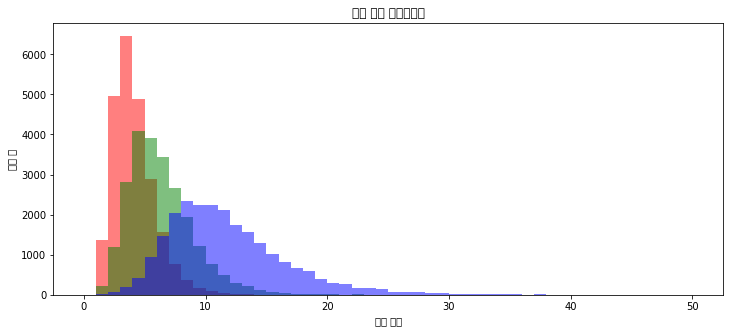

In [25]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_emjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')

plt.title('문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('문장 수')

Text(0, 0.5, '문장 수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_

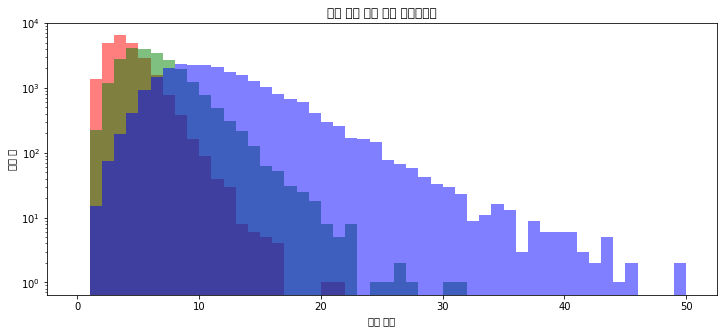

In [26]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_emjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')
plt.yscale('log')
plt.title('음절 토큰 문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('문장 수')

In [27]:
print("어절 최대 길이 : {}".format(np.max(sent_len_by_token)))
print("어절 최소 길이 : {}".format(np.min(sent_len_by_token)))
print("어절 평균 길이 : {}".format(np.mean(sent_len_by_token)))
print("어절 길이 표준편차 : {:.2f}".format(np.std(sent_len_by_token)))
print("어절 중간 길이 : {:.2f}".format(np.median(sent_len_by_token)))
print("제 1사분위 길이 : {}".format(np.percentile(sent_len_by_token, 25)))
print("제 3사분위 길이 : {}".format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이 : 21
어절 최소 길이 : 1
어절 평균 길이 : 3.6405311680622514
어절 길이 표준편차 : 1.74
어절 중간 길이 : 3.00
제 1사분위 길이 : 2.0
제 3사분위 길이 : 5.0


In [28]:
print("형태소 최대 길이 : {}".format(np.max(sent_len_by_morph)))
print("형태소 최소 길이 : {}".format(np.min(sent_len_by_morph)))
print("형태소 평균 길이 : {}".format(np.mean(sent_len_by_morph)))
print("형태소 길이 표준편차 : {:.2f}".format(np.std(sent_len_by_morph)))
print("형태소 중간 길이 : {:.2f}".format(np.median(sent_len_by_morph)))
print("형태소 제 1사분위 길이 : {}".format(np.percentile(sent_len_by_morph, 25)))
print("형태소 제 3사분위 길이 : {}".format(np.percentile(sent_len_by_morph, 75)))

형태소 최대 길이 : 31
형태소 최소 길이 : 1
형태소 평균 길이 : 5.832995009726804
형태소 길이 표준편차 : 2.71
형태소 중간 길이 : 5.00
형태소 제 1사분위 길이 : 4.0
형태소 제 3사분위 길이 : 7.0


In [29]:
print("음절 최대 길이 : {}".format(np.max(sent_len_by_emjeol)))
print("음절 최소 길이 : {}".format(np.min(sent_len_by_emjeol)))
print("음절 평균 길이 : {}".format(np.mean(sent_len_by_emjeol)))
print("음절 길이 표준편차 : {:.2f}".format(np.std(sent_len_by_emjeol)))
print("음절 중간 길이 : {:.2f}".format(np.median(sent_len_by_emjeol)))
print("음절 제 1사분위 길이 : {}".format(np.percentile(sent_len_by_emjeol, 25)))
print("음절 제 3사분위 길이 : {}".format(np.percentile(sent_len_by_emjeol, 75)))

음절 최대 길이 : 57
음절 최소 길이 : 1
음절 평균 길이 : 11.306563477966675
음절 길이 표준편차 : 4.98
음절 중간 길이 : 10.00
음절 제 1사분위 길이 : 8.0
음절 제 3사분위 길이 : 14.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f6f3a86b290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f3a84d2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f3a6fc850>,
 'means': [<matplotlib.lines.Line2D at 0x7f6f3a6fc310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6f3a84dd90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6f3a86b810>,
  <matplotlib.lines.Line2D at 0x7f6f3a70a6d0>]}

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_

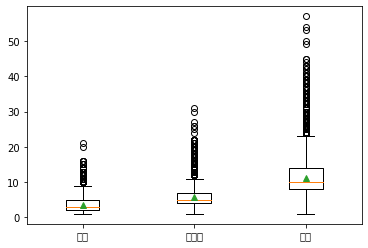

In [30]:
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_emjeol], 
            labels=['어절', '형태소', '음절'],
            showmeans=True)

In [34]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

In [35]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()


In [38]:
for s in query_sentences:
    for token, tag in okt.pos(s):
        if tag in ["Noun", 'Verb', 'Adjective']:
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    for token, tag in okt.pos(s):
        if tag in ['Noun', 'Verb', 'Adjective']:
            answer_NVA_token_sentences.append(token)

query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

In [39]:
pip install wordcloud

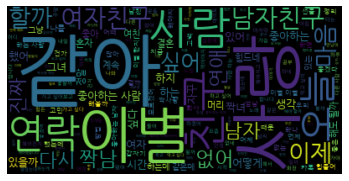

In [40]:
query_wordcloud = WordCloud(font_path=DATA_IN_PATH + "NanumGothic.ttf").generate(query_NVA_token_sentences)
plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

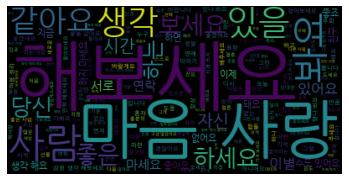

In [41]:
answer_wordcloud = WordCloud(font_path=DATA_IN_PATH + "NanumGothic.ttf").generate(answer_NVA_token_sentences)
plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
